In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
covid_confirmed = "time_series_covid19_confirmed_global.csv"
covid_recovered = "time_series_covid19_recovered_global.csv"
covid_death = "time_series_covid19_deaths_global.csv"

covid_confirmed_dataset = pd.read_csv(covid_confirmed)
covid_recovered_dataset = pd.read_csv(covid_recovered)
covid_death_dataset = pd.read_csv(covid_death)

In [3]:
covid_confirmed_dataset

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,726,736,750,766,773,782,789,795,803,820
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,738,743,743,743,745,745,747,748,750,751
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,26,27,27,27,27,30,35,35,35,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,4,4,8,8,14,16,16,16,23,174
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1,1,1,6,6,7,10,10,12,22
264,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,0,0,0,0,1,1,3,3,3,3


In [4]:
total_cases = covid_confirmed_dataset.iloc[:,4:].sum(axis = 0, skipna = True).astype(int).reset_index()
total_cases = total_cases.rename(columns={0 :'cases', 'index': 'dates'})
dates = total_cases['dates']
print(total_cases)

       dates    cases
0    1/22/20      555
1    1/23/20      654
2    1/24/20      941
3    1/25/20     1434
4    1/26/20     2118
..       ...      ...
100   5/1/20  3343777
101   5/2/20  3427343
102   5/3/20  3506729
103   5/4/20  3583055
104   5/5/20  3662691

[105 rows x 2 columns]


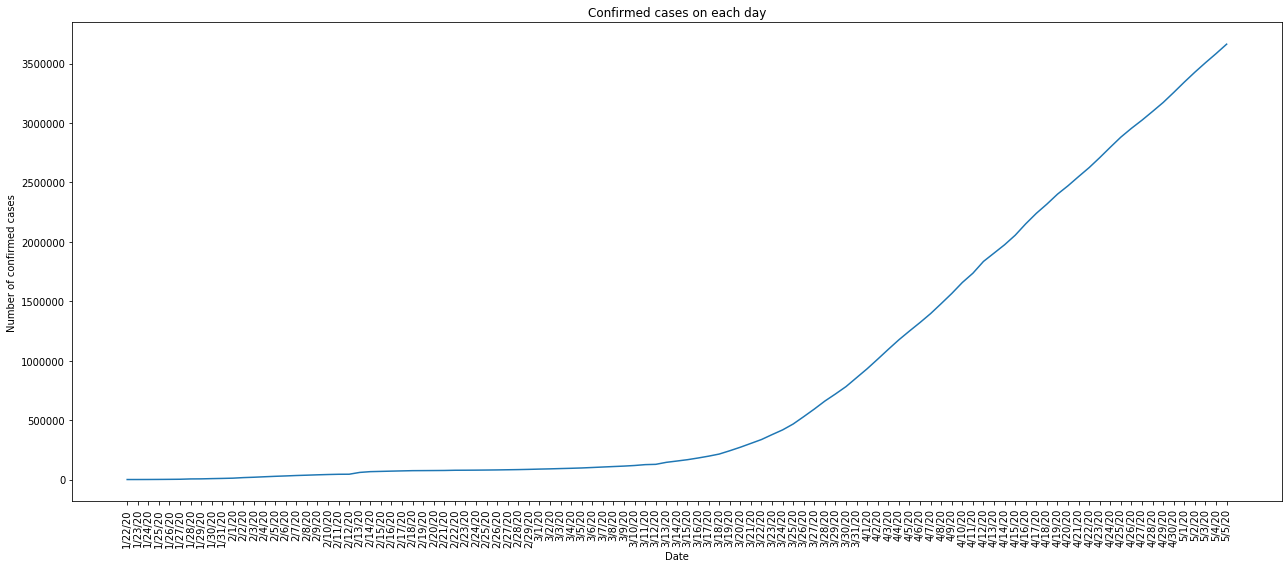

In [5]:
plt.figure(figsize = (18,8))
plt.plot(total_cases['dates'],total_cases['cases'])
plt.ylabel("Number of confirmed cases")
plt.xlabel("Date")
plt.title("Confirmed cases on each day")
plt.xticks(rotation= 90)
plt.tight_layout()
plt.show()

In [6]:
total_cases_per_week = total_cases.copy()
week_cases = list(range(6,len(total_cases_per_week['dates'].tolist()),7))
week = list(range(len(week_cases)))
total_cases_per_week = total_cases_per_week.iloc[week_cases]
total_cases_per_week["week_no"] = week
total_cases_per_week = total_cases_per_week.rename(columns={'cases' :'total cases'})
total_cases_per_week = total_cases_per_week[['dates','week_no','total cases']]
print(total_cases_per_week)

       dates  week_no  total cases
6    1/28/20        0         5578
13    2/4/20        1        23892
20   2/11/20        2        44802
27   2/18/20        3        75136
34   2/25/20        4        80406
41    3/3/20        5        92840
48   3/10/20        6       118620
55   3/17/20        7       197113
62   3/24/20        8       418079
69   3/31/20        9       857608
76    4/7/20       10      1396438
83   4/14/20       11      1975581
90   4/21/20       12      2549175
97   4/28/20       13      3097190
104   5/5/20       14      3662691


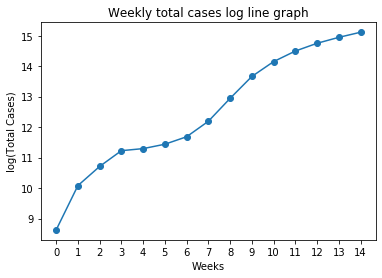

In [7]:
plt.plot(total_cases_per_week['week_no'],np.log(total_cases_per_week['total cases']), 'o-')
plt.xlabel("Weeks")
plt.ylabel("log(Total Cases)")
plt.title("Weekly total cases log line graph")
plt.xticks(list(range(len(week))))
plt.show()

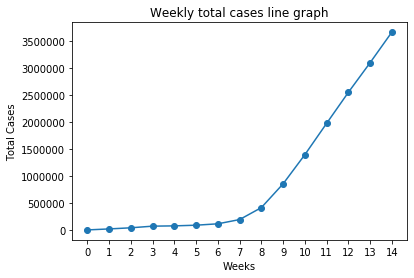

In [8]:
plt.plot(total_cases_per_week['week_no'],total_cases_per_week['total cases'], 'o-')
plt.xlabel("Weeks")
plt.ylabel("Total Cases")
plt.title("Weekly total cases line graph")
plt.xticks(list(range(len(week))))
plt.show()

In [9]:
per_week_new_cases = total_cases_per_week.copy()
first_week = per_week_new_cases["total cases"].tolist()[0]
per_week_new_cases["new cases"] = first_week
per_week_new_cases["new cases"][1:] = list(map(lambda i: per_week_new_cases["total cases"].tolist()[i] - per_week_new_cases["total cases"].tolist()[i-1],range(1,len(per_week_new_cases))))
per_week_new_cases = per_week_new_cases[["week_no","total cases","new cases"]]
print(per_week_new_cases)

     week_no  total cases  new cases
6          0         5578       5578
13         1        23892      18314
20         2        44802      20910
27         3        75136      30334
34         4        80406       5270
41         5        92840      12434
48         6       118620      25780
55         7       197113      78493
62         8       418079     220966
69         9       857608     439529
76        10      1396438     538830
83        11      1975581     579143
90        12      2549175     573594
97        13      3097190     548015
104       14      3662691     565501


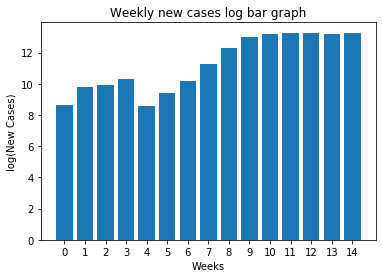

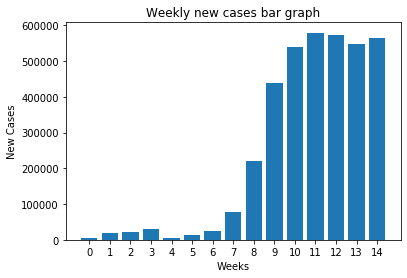

In [10]:
plt.bar(per_week_new_cases['week_no'],np.log(per_week_new_cases['new cases']))
plt.xlabel("Weeks")
plt.ylabel("log(New Cases)")
plt.title("Weekly new cases log bar graph")
plt.xticks(list(range(0,len(week))))
plt.show()
plt.bar(per_week_new_cases['week_no'],per_week_new_cases['new cases'])
plt.xlabel("Weeks")
plt.ylabel("New Cases")
plt.title("Weekly new cases bar graph")
plt.xticks(list(range(0,len(week))))
plt.show()

In [11]:
print(covid_death_dataset.head())

  Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/26/20  4/27/20  4/28/20  4/29/20  \
0        0        0        0  ...       50       57       58       60   
1        0        0        0  ...       28       28       30       30   
2        0        0        0  ...      425      432      437      444   
3        0        0        0  ...       40       40       41       42   
4        0        0        0  ...        2        2        2        2   

   4/30/20  5/1/20  5/2/20  5/3/20  5/4/20  5/5/20  
0       64      68      72 

In [12]:
deaths = covid_death_dataset.iloc[:,4:].sum(axis = 0, skipna = True).astype(int).reset_index()
deaths = deaths.rename(columns={0 :'total deaths','index':'dates'})
deaths = deaths.iloc[week_cases]
deaths["week_no"] = week.copy()
deaths = deaths[['week_no','total deaths']]
deaths["new deaths"] = deaths["total deaths"].tolist()[0]
deaths["new deaths"][1:] = list(map(lambda i: deaths["total deaths"].tolist()[i] - deaths["total deaths"].tolist()[i-1],range(1,len(deaths))))
print(deaths)

     week_no  total deaths  new deaths
6          0           131         131
13         1           492         361
20         2          1113         621
27         3          2007         894
34         4          2708         701
41         5          3160         452
48         6          4263        1103
55         7          7956        3693
62         8         19014       11058
69         9         44238       25224
76        10         86662       42424
83        11        132439       45777
90        12        180237       47798
97        13        220799       40562
104       14        257239       36440


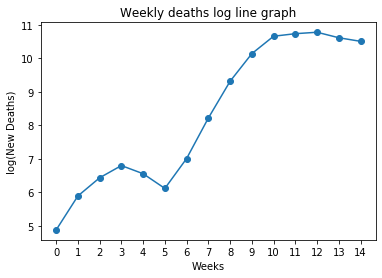

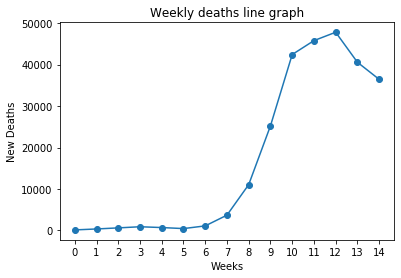

In [13]:
plt.plot(deaths['week_no'],np.log(deaths['new deaths']), 'o-')
plt.xlabel("Weeks")
plt.ylabel("log(New Deaths)")
plt.xticks(list(range(0,len(week),1)))
plt.title("Weekly deaths log line graph")
plt.show()
plt.plot(deaths['week_no'],deaths['new deaths'], 'o-')
plt.xlabel("Weeks")
plt.ylabel("New Deaths")
plt.xticks(list(range(0,len(week),1)))
plt.title("Weekly deaths line graph")
plt.show()

In [14]:
country = covid_confirmed_dataset.copy()
country["Total Cases"] = covid_confirmed_dataset[dates.tolist()[-1]]
top_country = country[['Country/Region','Total Cases']]
top_country = top_country.groupby('Country/Region').sum().sort_values(by = 'Total Cases', ascending = False).reset_index()
top_10_confirmed = top_country.head(10)
top_10_confirmed = top_10_confirmed.sort_values(by='Country/Region', ascending = False)
print(top_country.head(10))

   Country/Region  Total Cases
0              US      1204351
1           Spain       219329
2           Italy       213013
3  United Kingdom       196243
4          France       170687
5         Germany       167007
6          Russia       155370
7          Turkey       129491
8          Brazil       115455
9            Iran        99970


In [15]:
top_10_country_date_wise = country.sort_values(['Total Cases'], ascending=False)
top_10_country_date_wise = top_10_country_date_wise.groupby('Country/Region').sum()
top_10_country_date_wise = top_10_country_date_wise.sort_values(by = 'Total Cases', ascending = False)
top_10_country_date_wise = top_10_country_date_wise.drop(columns = ["Lat","Long","Total Cases"])
top_10_country_date_wise = top_10_country_date_wise.iloc[:,week_cases]
top_10_country_date_wise.columns = week
top_10_country_date_wise = top_10_country_date_wise.T
for each_country in top_10_country_date_wise:
    top_10_country_date_wise[each_country][1:] = list(map(lambda i: top_10_country_date_wise[each_country].tolist()[i] - top_10_country_date_wise[each_country].tolist()[i-1],range(1,len(top_10_country_date_wise))))
top_10_country_date_wise = top_10_country_date_wise.T
print(top_10_country_date_wise.head(10))

                0   1   2   3    4     5     6      7      8       9       10  \
Country/Region                                                                  
US               5   6   1   1   38    67   841   5462  47315  134436  208949   
Spain            0   1   1   0    4   159  1530  10053  28137   56038   46019   
Italy            0   2   1   0  319  2180  7647  21357  37670   36616   29794   
United Kingdom   0   2   6   1    4    38   333   1576   6204   17317   30468   
France           4   2   5   1    2   190  1590   5921  14907   30205   26336   
Germany          4   8   4   0    1   179  1261   7800  23729   38822   35855   
Russia           0   2   0   0    0     1    17     94    381    1842    5160   
Turkey           0   0   0   0    0     0     0     47   1825   11659   20578   
Brazil           0   0   0   0    0     2    29    290   1926    3470    8317   
Iran             0   0   0   0   95  2241  5706   8127   8642   19794   17984   

                    11     

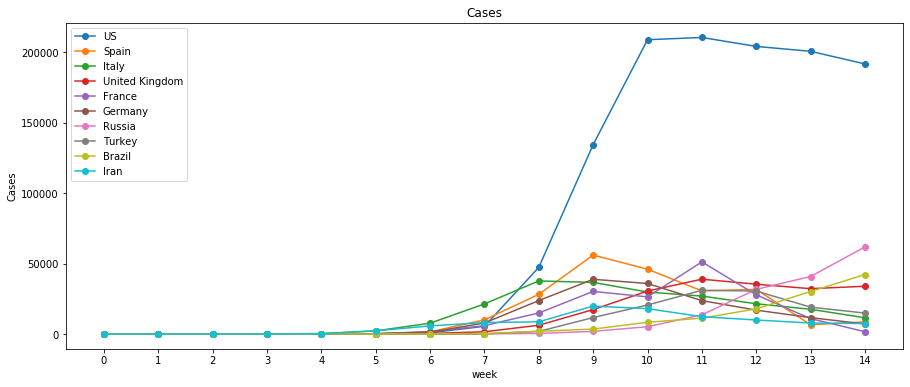

In [16]:
plt.figure(figsize = (15,6))
for data in range(10):
    plt.plot(top_10_country_date_wise.iloc[data].T, 'o-',label = top_country["Country/Region"].iloc[data])
plt.title("Cases")
plt.xlabel("week")
plt.ylabel("Cases")
plt.xticks(range(0,len(week),1))
plt.legend(loc = 'upper left')
plt.show()

In [17]:
covid_recovered_dataset

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,207,220,228,252,260,310,331,345,397,421
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,410,422,431,455,470,488,519,531,543,570
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,1508,1558,1651,1702,1779,1821,1872,1936,1998,2067
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,344,385,398,423,468,468,472,493,499,514
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,6,6,6,7,7,11,11,11,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5
248,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,0,0,4,4,4,4,4,4,4,4
249,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
250,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
covid_recovered_dataset["Total recovered"] = covid_recovered_dataset[dates.tolist()[-1]]
top_recovered_country = covid_recovered_dataset[covid_recovered_dataset['Country/Region'].str.contains('|'.join(list(top_country['Country/Region'].head(10))))][['Country/Region','Total recovered']]
top_recovered_country = top_recovered_country.groupby('Country/Region').sum().sort_values(by = 'Country/Region').reset_index()
top_recovered_country = top_recovered_country.sort_values(by = 'Country/Region', ascending = False)
top_recovered_country["Total Cases"] = top_10_confirmed["Total Cases"].tolist()
top_recovered_country

,Country/Region,Total recovered,Total Cases
9,United Kingdom,926,196243
8,US,189791,1204351
7,Turkey,73285,129491
6,Spain,123486,219329
5,Russia,19865,155370
4,Italy,85231,213013
3,Iran,80475,99970
2,Germany,135100,167007
1,France,52842,170687
0,Brazil,48221,115455


In [19]:
top_10_country_date_wise_recovered =  covid_recovered_dataset[covid_recovered_dataset['Country/Region'].str.contains('|'.join(list(top_country['Country/Region'].head(10))))]
top_10_country_date_wise_recovered = top_10_country_date_wise_recovered.sort_values(['Total recovered'], ascending=False)
top_10_country_date_wise_recovered = top_10_country_date_wise_recovered.groupby('Country/Region').sum()
top_10_country_date_wise_recovered = top_10_country_date_wise_recovered.sort_values(by = 'Total recovered', ascending = False)
top_10_country_date_wise_recovered = top_10_country_date_wise_recovered.drop(columns = ["Lat","Long","Total recovered"])
top_10_country_date_wise_recovered = top_10_country_date_wise_recovered.iloc[:,week_cases]
top_10_country_date_wise_recovered.columns = week
top_10_country_date_wise_recovered = top_10_country_date_wise_recovered.T
for each_country in top_10_country_date_wise_recovered:
    top_10_country_date_wise_recovered[each_country][1:] = list(map(lambda i: top_10_country_date_wise_recovered[each_country].tolist()[i] - top_10_country_date_wise_recovered[each_country].tolist()[i-1],range(1,len(top_10_country_date_wise_recovered))))
top_10_country_date_wise_recovered = top_10_country_date_wise_recovered.T
print(top_10_country_date_wise_recovered)

                0   1   2   3   4    5     6     7     8      9      10  \
Country/Region                                                            
US               0   0   3   0   3    1     1     9   331   6676  14739   
Germany          0   0   0  12   2    2     2    49  3176  12857  19981   
Spain            0   0   0   2   0    0    30   996  2766  15465  23949   
Italy            0   0   0   0   1  159   564  2217  5385   7403   8663   
Iran             0   0   0   0   0  291  2440  2658  3524   5743  12383   
Turkey           0   0   0   0   0    0     0     0     0    243   1339   
France           0   0   0   4   7    1     0     0  3238   6263  10010   
Brazil           0   0   0   0   0    0     0     2     0    125      0   
Russia           0   0   0   2   0    0     1     5    14     99    373   
United Kingdom   0   0   0   8   0    0    11    34    87     39    146   

                   11     12     13     14  
Country/Region                              
US       

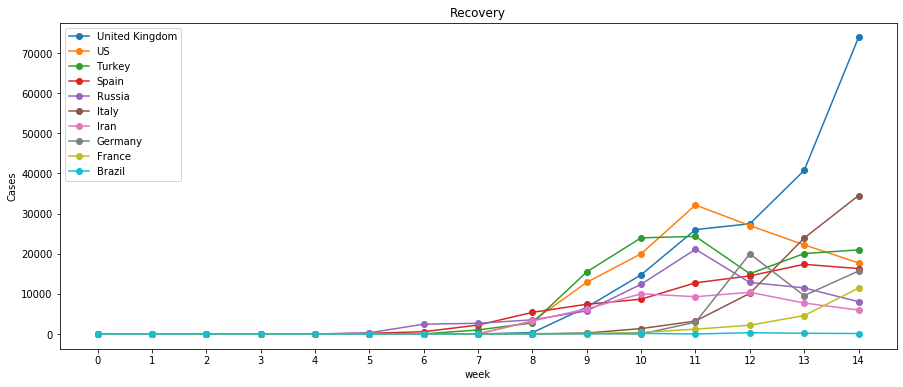

In [20]:
plt.figure(figsize = (15,6))
for data in range(10):
    plt.plot(top_10_country_date_wise_recovered.iloc[data].T,'o-' ,label = top_recovered_country["Country/Region"].iloc[data])
plt.title("Recovery")
plt.xlabel("week")
plt.ylabel("Cases")
plt.xticks(range(0,len(week),1))
plt.legend(loc = 'upper left')
plt.show()